<a href="https://colab.research.google.com/github/Sumukhfintech/Comparison-of-different-investment-strategies/blob/main/Final_project_code_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: 'FINA 6333 Group Project 1'
author: 'Group 7'
institute: D'Amore-McKim School of Business, Northeastern University
toc: false
execute:
    echo: false
    warning: false
    
---


# Assumption

We assume that the investor on January 1,2024 decides on how to invest his/her $10,000 to generate the most returns. He/she has concluded that the S&P 500 ETF would give the most diversification but is confused on the strategies that would give the most returns. The investor has 4 strategies in mind and plans to back test them to determine on the future course of action.

We assume the investor is from Texas, so would not be liable to state income tax or a capitulational gains tax and uses a zero-brokerage account. We also assume the investor is a single filer making $11,000 in income, so would only be liable for 10% federal STCG.

⁠We have also taken into consideration that for LTCG, the investor can only account 60% of their gains as LTCG and rest considered as STCG. We also accounted for the higher minimum STCG of 15% pre 2001

⁠We also assume that all the taxes are settled at the end of the year for short term capital gains tax, the tax harvest is adjusted automatically throughout the lifespan, and that the person doesn't face the issue of the $3000 tax harvesting limit.
⁠1. We are also assuming a long only strategy, each with the duration from 29 Jan 1993 to 31 Dec 2023.

In [ ]:
#Importing the required packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
etfdata = yf.download(tickers = 'SPY',start='1993-01-29', end='2023-12-31') #downloads daily etf price data as a dataframe from start of etf trading till last date
#print(f"\nDatatype of etfdataframe:\n{etfdata.dtypes}") # check datatypes of the loaded dataset
etfdata_df = etfdata.copy(deep = True) #We will use this for strategy 1
etfdata_df= etfdata.reset_index() #Converting the Date Index into a column in the dataframe
#print(f"\nThe datatype of the etf_df dataframe:\n{etfdata_df.dtypes}\n\nWe have now successfully removed the herierachial index with date")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
etfdata_df['log_return'] = np.log1p(etfdata_df['Adj Close'].pct_change()) #Utilizing log returns for its usefuleness. We use adj close because holders of SPY get dividends not accounted in closing price.
etfdata_df = etfdata_df.dropna() #drop any row with value NA

In [ ]:
etfdata_df['cum_log_returns'] = etfdata_df['log_return'].cumsum() #get cumulative logreturns day by day
etfdata_df['year'] = etfdata_df['Date'].dt.year #Creating an year column by extracting the year from the datetimeindex
etfdata_df['Cumulative_Daily_HPR(in %)'] = 100*(np.exp(etfdata_df['cum_log_returns']) - 1)#returns for holding n number of days
etfdata_df[['Date', 'Adj Close', 'log_return', 'cum_log_returns','Cumulative_Daily_HPR(in %)']] #columns we need for strategy1


,Date,Adj Close,log_return,cum_log_returns,Cumulative_Daily_HPR(in %)
1,1993-02-01,25.017363,0.007087,0.007087,0.711251
2,1993-02-02,25.070354,0.002116,0.009203,0.924578
3,1993-02-03,25.335381,0.010516,0.019719,1.991481
4,1993-02-04,25.441381,0.004175,0.023894,2.418204
5,1993-02-05,25.423706,-0.000695,0.023199,2.347049
...,...,...,...,...,...
7781,2023-12-22,473.649994,0.002008,2.947986,1806.751091
7782,2023-12-26,475.649994,0.004214,2.952200,1814.802400
7783,2023-12-27,476.510010,0.001806,2.954006,1818.264526
7784,2023-12-28,476.690002,0.000378,2.954384,1818.989115


In [ ]:
#Calculating the portfolio returns
hpr = etfdata_df['Cumulative_Daily_HPR(in %)'].iloc[-1] #to get hpr
inv = 10000 #we invest $10,000
pretaxret = (1+hpr) * inv
print(f"Returns from conducting this strategy: {hpr:.2f}%") #fstrings are the same as format for newer python and we use 2 decimals
print(f"Pretax return: ${pretaxret:.2f}")
#Only 60% of income can be accounted for LTCG and 40% is STCG. Assuming it's a single filer who makes less than 11,000 in income . The person needs to only pay 10%
posttaxret = pretaxret - (0.4*pretaxret*0.1)
overallhpr = (posttaxret/inv) - 1
print(f"\nFinal return: ${posttaxret:.2f}")
print(f"Tax adjusted returns from holding the portfolio: {overallhpr:.2f}%")

Returns from conducting this strategy: 1813.43%
Pretax return: $18144336.92

Final return: $17418563.44
Tax adjusted returns from holding the portfolio: 1740.86%


# Strategy 1: Holding Period from Start to End

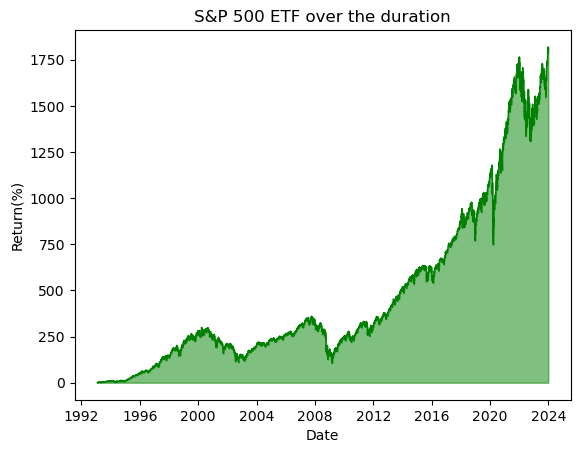

In [ ]:
#Plotting the price movement over time
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 1) #plotting the line graph
plt.fill_between(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',alpha = 0.5) #Function to fill in the area in between
plt.title('S&P 500 ETF over the duration')
plt.xlabel('Date')
plt.ylabel('Return(%)')
plt.show() #plotting the graph

# Interpretation:

This strategy suits a passive investor wanting to invest and forget about it for a long period of time.
We conclude that even though the investor faced losses while extreme volatility like pandemic or 2008 financial crisis, the overall returns outweighs the associated risks.
Overall profit after tax: 1740.86%

## Pros:
1. Low transaction cost
1. Time saving
1. Low taxes

## Cons:
1. High opportunity cost
1. Different strategy could be much more lucrative

[*********************100%%**********************]  1 of 1 completed


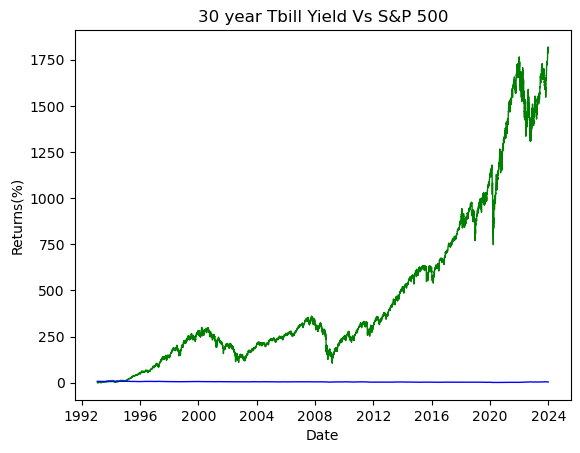

The blue line represents the daily yield of the 30 Year T bond. If the person invests in the Tbond at the same start date as SPY then they earn 7.21%.
We can see the line remains relatively flat, so even discounting early won't give the investor a lot of returns compared to the exponential returns possible through SPY


In [ ]:
#Charting against a hypothetical risk free yield curve

#Gathering risk free data
tbill_df = yf.download(tickers = '^TYX', start = '1993-01-29', end = '2023-12-31') #downloading 30 year tbond as comparison
tbill_df = tbill_df.reset_index()
yieldinv = tbill_df[tbill_df['Date'] == '1993-01-29']['Adj Close'].iloc[0]
tax=0.1
tbret = (1+(yieldinv/100))*10000
gaintbill = tbret - 10000

#Check if the investor made gain
if gaintbill > 0:
  taxable = gaintbill - (0.4*gaintbill*tax)
  tbret = tbret - taxable

# print(f"Return if person invests in the 30 year bond at 1993 in 2023: ${tbret: .2f}")

#Matching dates
merged_ret = pd.merge(tbill_df[['Date','Adj Close']],etfdata_df[['Date','Cumulative_Daily_HPR(in %)']], on = 'Date', how = 'inner')

#Plotting
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color = 'green', linewidth = 1)
plt.plot(tbill_df['Date'],tbill_df['Adj Close'],color ='blue',linewidth = 1)
plt.title("30 year Tbill Yield Vs S&P 500")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

print(f"The blue line represents the daily yield of the 30 Year T bond. If the person invests in the Tbond at the same start date as SPY then they earn {yieldinv:.2f}%.")
print("We can see the line remains relatively flat, so even discounting early won't give the investor a lot of returns compared to the exponential returns possible through SPY")


# Strategy 2: Day Trading

In [ ]:
#We need Open and Close Prices for day trading. Plus a column for tax adjusted returns.
etfdata_of = etfdata.copy(deep = True)
etfdata_of = etfdata_of.reset_index()
etfdata_of['log_return'] = np.log1p(etfdata_of[['Open','Close']].pct_change(axis = 1)['Close'])
etfdata_of['cum_log_returns'] = etfdata_of['log_return'].cumsum()
etfdata_of['Inv_ret(%)'] = 100*(np.exp(etfdata_of['cum_log_returns']) - 1)
etfdata_of['Year'] = etfdata_of['Date'].dt.year

#Add an exit loop if investment loss are more than 100%
# Find the index where Portfolio_ret(in %) is -100 or less for the first time
close_trade = etfdata_of[etfdata_of['Inv_ret(%)'] <= -100].first_valid_index()

# If such a value is found, truncate the dataframe at that point
if close_trade is not None:
    # Slice the dataframe to include rows up to the found index
    etfdata_of = etfdata_of.loc[:close_trade-1]
else:
    # If no such value is found, the dataframe remains unchanged
    print("Investor never loses full amount.The investor can continue trading throughout the duration.\n")

# print(etfdata_of[['Date','Adj Close','Inv_ret(%)',"Year"]])
dayret = etfdata_of['Inv_ret(%)'].iloc[-1]
# print(f"\n If there is no taxes, then the return earned by the investor is {dayret: .2f}%")

Investor never loses full amount.The investor can continue trading throughout the duration.



In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_of.groupby('Year')['Inv_ret(%)'].last() - etfdata_of.groupby('Year')['Inv_ret(%)'].first()
# print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss

# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from day-trading: {net_return: .2f}%")

Post-tax return on investment: $ 9810.17
Post-tax return from day-trading: -1.90%


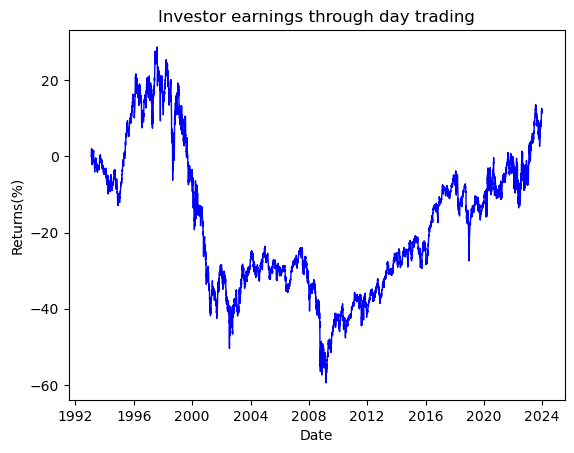

In [ ]:
#Plot the pre tax investing returns
plt.plot(etfdata_of['Date'],etfdata_of['Inv_ret(%)'],color='blue', linewidth = 1)
plt.title("Investor earnings through day trading")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

# Interpretation:

We believe that this strategy won't be fruitful for any type of investor either risk averse or a risk seeker. A risk averse person wouldn't invest everyday if he/she knows a financial crisis is going on and at the same time, a risk seeker won't be interested as well as he/she wouldn't be getting the returns for the risk involved.
There are more negative aspects like the transaction cost of trading as it would be absurdly high along with opportunity cost of missing the overnight market.
Overall profit after tax: -1.90%

## Pros:
1. No overnight exposure
1. High liquidity
1. Low opportunity cost - ability to pursue better opportunities if they arrise

## Cons:
1. emotional stress
1. Limited time horizon
1. High transaction cost
1. Market volatility

# Strategy 3: Overnight Trading

In [ ]:
#we assume both overnight and pre-market session for the strategy for ease of data
etfdata_raw = etfdata.copy(deep = True)
etfdata_raw = etfdata_raw.reset_index() #changing date to remove heriarchial index
etfdata_raw = etfdata_raw[["Date","Open","Adj Close"]] #we need only these two for over night
open = (etfdata_raw['Open'][1:].reset_index())["Open"] #we exit in day 2 so slicing from 1
adj_close = (etfdata_raw['Adj Close'][0:7785].reset_index())["Adj Close"] #we enter at day 1 and will enter till n-1 days
etfdata_raw['Year'] = etfdata_raw['Date'].dt.year

#Calculating the profit
net_profit = adj_close - open
net_profit_pct = net_profit.pct_change()
etfdata_raw["capital_gain"] = net_profit_pct
etfdata_raw = etfdata_raw.dropna() #dropping the non entry days
etfdata_raw['cum_inv(%)'] = (1+etfdata_raw['capital_gain']).cumprod()

#Add an exit loop if investment loss are more than 100%
# Find the index where Portfolio_ret(in %) is -100 or less for the first time
close_trade1 = etfdata_raw[etfdata_raw['cum_inv(%)'] <= -100].first_valid_index()

# If such a value is found, truncate the dataframe at that point
# if close_trade1 is not None:
#     # Slice the dataframe to include rows up to the found index
#     etfdata_raw = etfdata_raw.loc[:close_trade1-1]
# else:
#     # If no such value is found, the dataframe remains unchanged
#     print("Investor never loses full amount.The investor can continue trading throughout the duration.\n")

# print(etfdata_raw[['Date','Adj Close','cum_inv(%)']])
oret = etfdata_raw['cum_inv(%)'].iloc[-1]
# print(f"\nIf there is no taxes, then the return earned by the investor is {oret: .2f}%")

In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_raw.groupby('Year')['cum_inv(%)'].last() - etfdata_raw.groupby('Year')['cum_inv(%)'].first()
# print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss

# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from overnight-trading: {net_return: .2f}%")


Post-tax return on investment: $ 9944.71
Post-tax return from overnight-trading: -0.55%


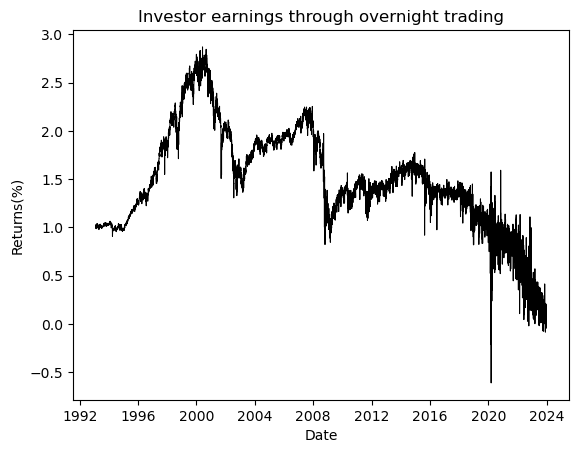

In [ ]:
#Plot the pre tax investing returns
plt.plot(etfdata_raw['Date'],etfdata_raw['cum_inv(%)'],color='black', linewidth = 0.75)
plt.title("Investor earnings through overnight trading")
plt.xlabel('Date')
plt.ylabel('Returns(%)')
plt.show()

# Interpretation:

We believe that strategy 3 is similar in terms of strategy 2, no type of investor would go for a strategy like this since it is yielding negative profits at the end of 30 years.
This strategy will not only decrease the liquidity but also incur a lot of transaction costs.
Overall profit after tax: - 0.55%


## Pros:
1. Early reaction to news
1. Opportunity for after hours gain
1. Potential for lower price volatility


## Cons:
1. Increased risk and volatility
1. Higher transaction cost
1. Missing out on lucrative intraday opportunities
1. Lack of liquidity

# Strategy 4: Holding from Start to End and exiting for the best and worst 3 days each year

In [ ]:
#Removing the least values
etfdata_df_minranks = etfdata_df.copy(deep=True) #create deepcopy to prevent any changes to original
etfdata_df_minranks["rank"] = etfdata_df_minranks.groupby("year")['log_return'].rank(method="first", ascending=True) #ranks assigned by the order they appear
etfdata_df_minranks = etfdata_df_minranks[~etfdata_df_minranks['rank'].isin([1, 2, 3])] #removing the three worst days
etfdata_df_minranks.drop(columns=['rank'], inplace=True) #columns no longer needed
# print(etfdata_df_minranks[["year","Date","Adj Close","log_return"]])

In [ ]:
#Removing the max values
etfdata_df_maxranks = etfdata_df.copy(deep=True)
etfdata_df_maxranks["rank"] = etfdata_df_maxranks.groupby("year")['log_return'].rank(method="first", ascending=False) #ranks assigned by the order they appear
etfdata_df_maxranks = etfdata_df_maxranks[~etfdata_df_maxranks['rank'].isin([1, 2, 3])] #removing the best three days
etfdata_df_maxranks.drop(columns=['rank'], inplace=True) #columns no longer needed
# print(etfdata_df_maxranks[["year","Date","Adj Close","log_return"]])


In [ ]:
etfdata_df2 = pd.merge(etfdata_df_minranks, etfdata_df_maxranks, how='inner') #innerjoin to combine the values without the best and worst values
etfdata_df2['cum_log_returns'] = etfdata_df2['log_return'].cumsum()
etfdata_df2['Cumulative_Daily_HPR(in %)'] = 100*(np.exp(etfdata_df2['cum_log_returns']) - 1)
# print(etfdata_df2[["Date",'year', "Adj Close","log_return",'Cumulative_Daily_HPR(in %)']])

#Pre tax returns
wret = etfdata_df2['Cumulative_Daily_HPR(in %)'].iloc[-1]
print(f"\n If there is no taxes, then the return earned by the investor is {wret: .2f}%")


 If there is no taxes, then the return earned by the investor is  2110.22%


In [ ]:
#Calculating after_tax return
#Person at the end of the year can harvest their losses to recoup the short term capital gains tax paid
yearly_returns = etfdata_df2.groupby('year')['Cumulative_Daily_HPR(in %)'].last() - etfdata_df2.groupby('year')['Cumulative_Daily_HPR(in %)'].first()
# print(pd.DataFrame(yearly_returns))

# Create profit and loss variables
profit = 0
loss = 0

# Calculate profit and loss for each year
for year,yreturn in yearly_returns.items():
    if yreturn > 0:
      if 1993 <= year <= 2000:
        profit += yreturn * 0.85 #tax during this time is 15%
      else:
        profit += yreturn * 0.9 #tax during this time is 10%
    else:
        loss += yreturn

# Calculate net return after adjusting for loss
net_return = profit + loss
a = [net_return]

print(a.sort())




# Assuming an initial investment of 10,000
initial_investment = 10000
post_tax_investment_value = initial_investment + (initial_investment * net_return / 100)

print(f"Post-tax return on investment: ${post_tax_investment_value: .2f}")
print(f"Post-tax return from overnight-trading: {net_return: .2f}%")

None
Post-tax return on investment: $ 189767.15
Post-tax return from overnight-trading:  1797.67%


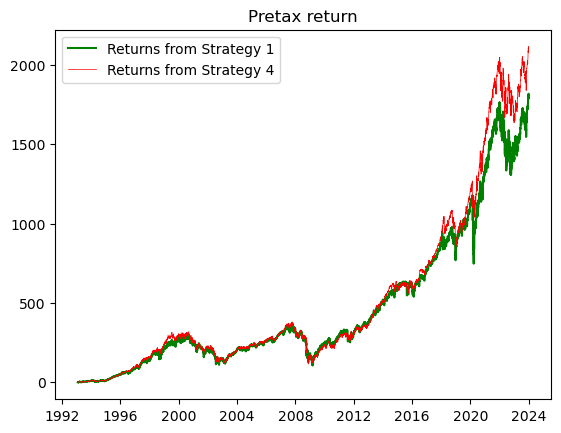

In [ ]:
plt.plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 1.5,label ='Returns from Strategy 1') #plotting the line graph
plt.plot(etfdata_df2['Date'],etfdata_df2['Cumulative_Daily_HPR(in %)'],color = 'red', linewidth = 0.5, label = 'Returns from Strategy 4')
plt.title("Pretax return")
plt.legend()

# Interpretation:

This strategy gave the best pre and post tax return on the market mainly due to removing the worst days like the dot com bubble crash, the 2008 crash, and the pandemic shocks.
However, the tax compliance for this strategy would be very complex and the after-tax profits that we calculated(on the basis of short-term capital gains) are likely to be inflated.
One of the main negative aspect of this strategy is the super-natural ability a person must posses to know the best and worst days is not possible in real life.
Overall profit after tax: 1797.68%

## Pros:
1. Exponential growth
1. Potential lower fee

## Cons:
1. Foresight ability (impossible)
1. Missing best days

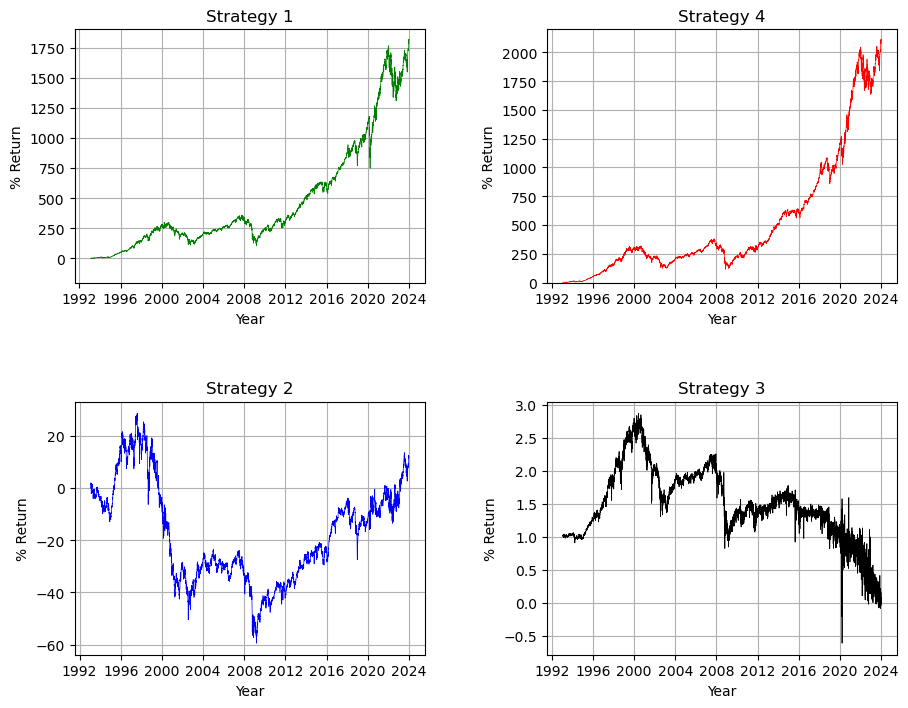

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(etfdata_df['Date'],etfdata_df['Cumulative_Daily_HPR(in %)'], color ='green',linewidth = 0.5,label ='Returns from Stragey 1')
axs[0,0].set_title("Strategy 1")
axs[0, 0].grid(True)
axs[0, 0].set_ylim(-200, 1900)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('% Return')

axs[0,1].plot(etfdata_df2['Date'],etfdata_df2['Cumulative_Daily_HPR(in %)'], color ='red',linewidth = 0.5,label ='Returns from Stragey 1')
axs[0,1].set_title("Strategy 4")
axs[0, 1].grid(True)
axs[0, 1].set_ylim(0, 2200)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('% Return')


axs[1,0].plot(etfdata_of['Date'],etfdata_of['Inv_ret(%)'],color='blue', linewidth = 0.5)
axs[1,0].set_title("Strategy 2")
axs[1, 0].grid(True)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('% Return')



axs[1,1].plot(etfdata_raw['Date'],etfdata_raw['cum_inv(%)'],color='black', linewidth = 0.55)
axs[1,1].set_title("Strategy 3")
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('% Return')

plt.tight_layout(pad=4.0)

# Show the plot
plt.show()


# Best back-tested Strategy:


After careful assessment of all the four
strategies presented to us, our favor would go in the direction of strategy one or strategy four purely on the basis of the profits.
But there are few reasons why we believe that
strategy 1 would still be better than strategy 4, such as:

1. The assumptions used for calculating tax in strategy four is extremely simple for the complex nature of STCG, relaxing the assumptions like the no yearly harvesting limit itself will reduce the profits.
2. Biggest shortcoming of strategy 4 is its foresight ability which is not possible in a real life scenario.





# Comparison with risk-free Alternative:

We have concluded that strategy 1 is the best ETF long only strategy. But what if there was an alternative to invest in a risk-free asset like a 30-year T-Bond.
Assuming the treasury bond in issue at the same time as the first SPY ETF is Zero Coupon, the YTM would 7.2%. The investor also doesn't really have an opportunity to profit of potential price fluctuations as the we can see from the graph that YTM is flat compared to the exponential growth witnessed by the SPY ETF.
Even if we relax the assumption of no coupons, generally the coupon rate tracks the YTM closely. Therefore, holding only T-bonds would not yield the investor sufficient returns.